## 第四节：高阶数据探索

## 4.2 高阶数据探索实战

In [ ]:
### 4.2.1 数据读取

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### 数据读取
path  = '../security_data/'
train = pd.read_csv(path + 'security_train.csv')
test  = pd.read_csv(path + 'security_test.csv')

In [3]:
train.head()

,file_id,label,api,tid,index
0,1,5,LdrLoadDll,2488,0
1,1,5,LdrGetProcedureAddress,2488,1
2,1,5,LdrGetProcedureAddress,2488,2
3,1,5,LdrGetProcedureAddress,2488,3
4,1,5,LdrGetProcedureAddress,2488,4


### 4.2.2 多变量交叉探索

In [4]:
train_analysis = train[['file_id','label']].drop_duplicates(subset = ['file_id','label'], keep = 'last')

In [5]:
dic_ = train['file_id'].value_counts().to_dict()
train_analysis['file_id_cnt'] = train_analysis['file_id'].map(dic_).values 

In [6]:
train_analysis['file_id_cnt'].value_counts()

2046     1
231      1
6786     1
12547    1
260      1
262      1
5282     1
5001     1
18028    1
205      1
110      1
463      1
816      1
5073     1
10002    1
118      1
13879    1
5447     1
12964    1
480      1
Name: file_id_cnt, dtype: int64

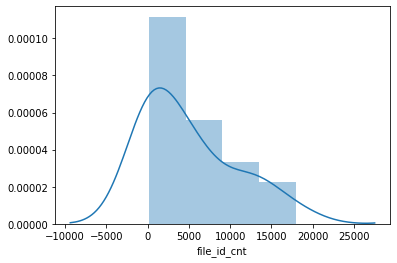

In [7]:
sns.distplot(train_analysis['file_id_cnt'])

In [8]:
print('There are {} data are below 10000'.format(np.sum(train_analysis['file_id_cnt'] <= 1e4) / train_analysis.shape[0]))

There are 0.75 data are below 10000


In [9]:
###  file_id_cnt & label 分析
def file_id_cnt_cut(x):
    if x< 15000:
        return x // 1e3
    else:
        return 15 

train_analysis['file_id_cnt_cut'] = train_analysis['file_id_cnt'].map(file_id_cnt_cut).values

In [ ]:
plt.figure(figsize=[16,20])
plt.subplot(321) 
train_analysis[train_analysis['file_id_cnt_cut'] == 0]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 0')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(322)
train_analysis[train_analysis['file_id_cnt_cut'] == 1]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 1')
plt.xlabel('label')
plt.ylabel('label_number')
 
plt.subplot(323)
train_analysis[train_analysis['file_id_cnt_cut'] == 14]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 14')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(324)
train_analysis[train_analysis['file_id_cnt_cut'] == 15]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 15')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(313) 
train_analysis['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('All Data')
plt.xlabel('label')
plt.ylabel('label_number') 

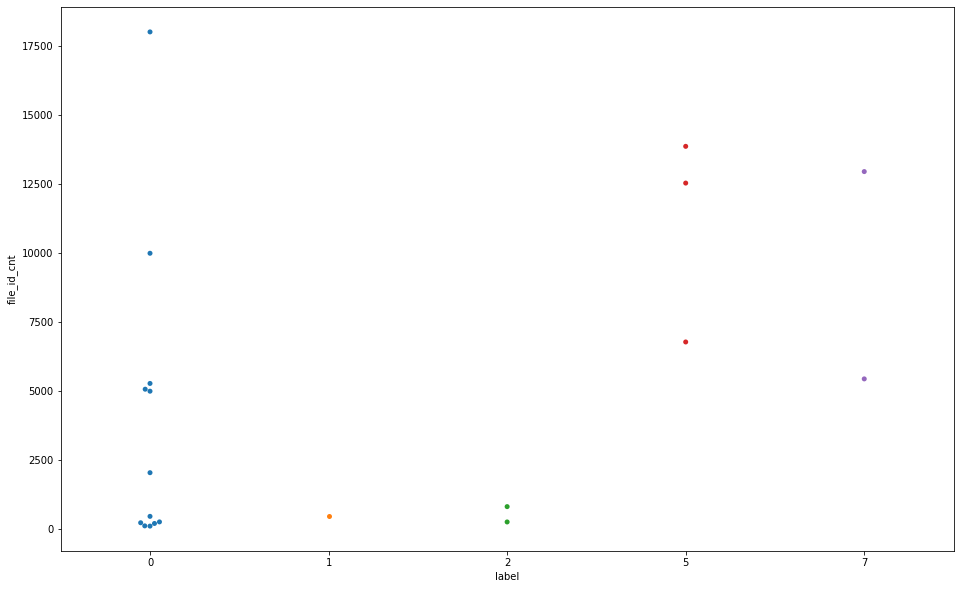

In [11]:
plt.figure(figsize=[16,10])
sns.swarmplot(x =train_analysis.iloc[:1000]['label'], y = train_analysis.iloc[:1000]['file_id_cnt'])

##### file_id & api 分析

In [12]:
dic_ = train.groupby('file_id')['api'].nunique().to_dict()
train_analysis['file_id_api_nunique'] = train_analysis['file_id'].map(dic_).values 

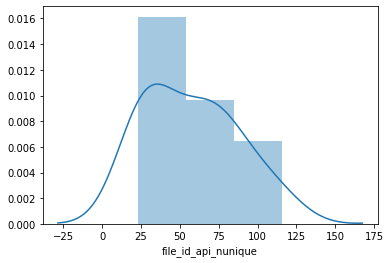

In [13]:
sns.distplot(train_analysis['file_id_api_nunique']) 

In [14]:
train_analysis['file_id_api_nunique'].describe()

count     20.000000
mean      57.300000
std       29.449511
min       23.000000
25%       29.000000
50%       56.500000
75%       75.500000
max      116.000000
Name: file_id_api_nunique, dtype: float64

Text(0, 0.5, 'label_number')

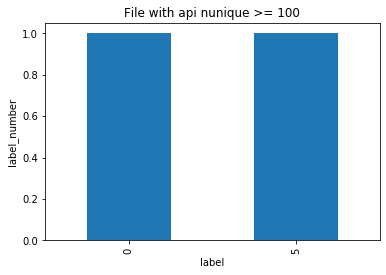

In [15]:
train_analysis.loc[train_analysis.file_id_api_nunique >=100]['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('File with api nunique >= 100')
plt.xlabel('label')
plt.ylabel('label_number') 

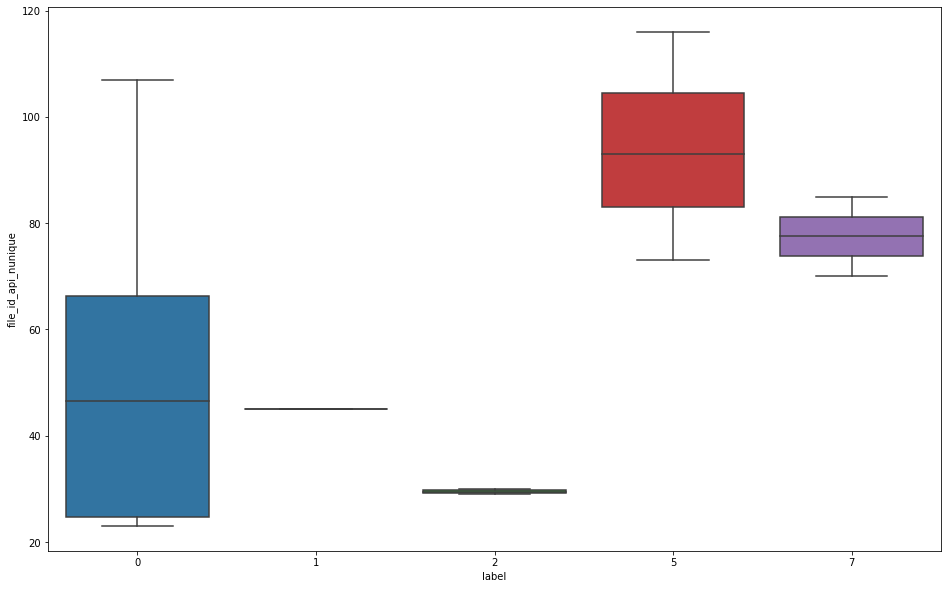

In [16]:
plt.figure(figsize=[16,10])
sns.boxplot(x =train_analysis['label'], y = train_analysis['file_id_api_nunique'])

##### file_id & index 分析

In [17]:
dic_ = train.groupby('file_id')['index'].nunique().to_dict()
train_analysis['file_id_index_nunique'] = train_analysis['file_id'].map(dic_).values 

In [18]:
train_analysis['file_id_index_nunique'].describe()

count      20.000000
mean     2055.750000
std      2127.864456
min        55.000000
25%       224.250000
50%      1162.000000
75%      5001.000000
max      5001.000000
Name: file_id_index_nunique, dtype: float64

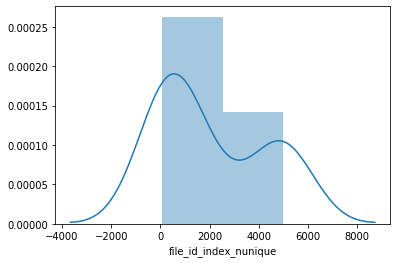

In [19]:
sns.distplot(train_analysis['file_id_index_nunique']) 

##### file_id_index_nunique + label 分析

In [ ]:
plt.figure(figsize=[16,8])
plt.subplot(121)
train_analysis.loc[train_analysis.file_id_index_nunique == 1]['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('File with index nunique = 1')
plt.xlabel('label')
plt.ylabel('label_number') 

plt.subplot(122)
train_analysis.loc[train_analysis.file_id_index_nunique == 5001]['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('File with index nunique = 5001')
plt.xlabel('label')
plt.ylabel('label_number') 

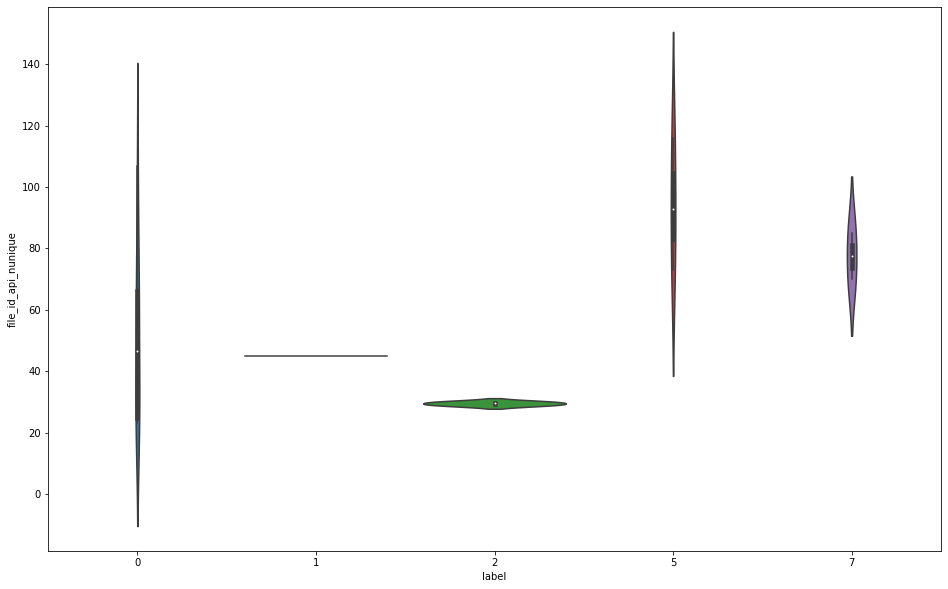

In [21]:
plt.figure(figsize=[16,10])
sns.violinplot(x =train_analysis['label'], y = train_analysis['file_id_api_nunique'])

##### file_id & index & max

In [22]:
dic_ = train.groupby('file_id')['index'].max().to_dict()
train_analysis['file_id_index_max'] = train_analysis['file_id'].map(dic_).values 

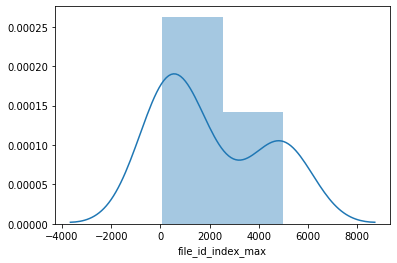

In [23]:
sns.distplot(train_analysis['file_id_index_max']) 

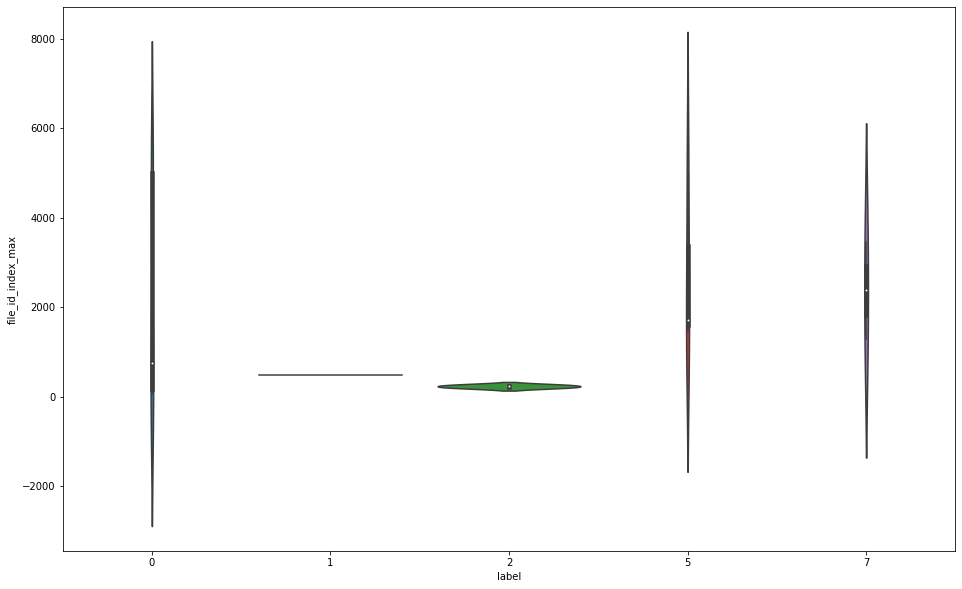

In [24]:
plt.figure(figsize=[16,10])
sns.violinplot(x =train_analysis['label'], y = train_analysis['file_id_index_max'])

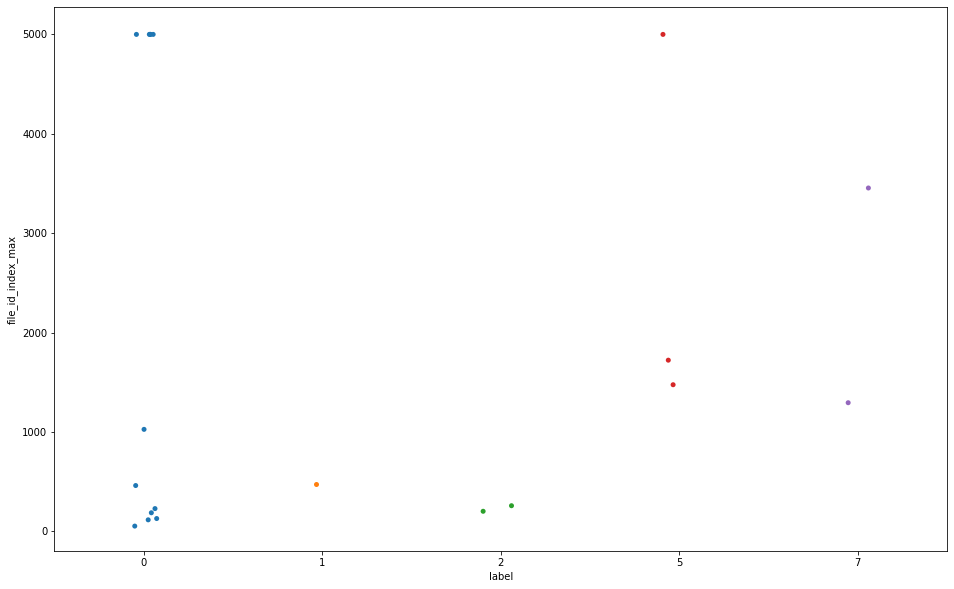

In [25]:
plt.figure(figsize=[16,10])
sns.stripplot(x =train_analysis['label'], y = train_analysis['file_id_index_max'])

##### file_id & tid 分析

In [26]:
dic_ = train.groupby('file_id')['tid'].nunique().to_dict()
train_analysis['file_id_tid_nunique'] = train_analysis['file_id'].map(dic_).values 

In [27]:
train_analysis['file_id_tid_nunique'].describe()

count    20.000000
mean      9.600000
std       9.986306
min       1.000000
25%       2.000000
50%       5.000000
75%      13.500000
max      32.000000
Name: file_id_tid_nunique, dtype: float64

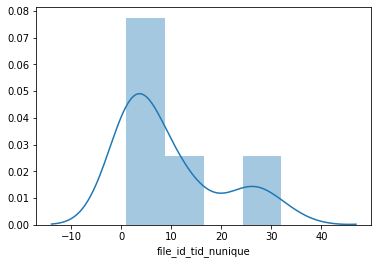

In [28]:
sns.distplot(train_analysis['file_id_tid_nunique']) 

##### file_id_tid_nunique & label 分析

Text(0, 0.5, 'label_number')

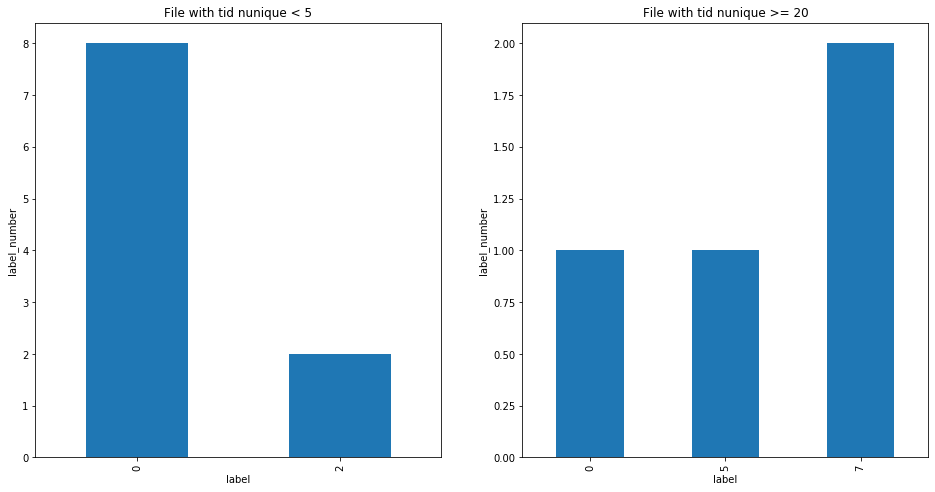

In [29]:
plt.figure(figsize=[16,8])
plt.subplot(121)
train_analysis.loc[train_analysis.file_id_tid_nunique < 5]['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('File with tid nunique < 5')
plt.xlabel('label')
plt.ylabel('label_number') 

plt.subplot(122)
train_analysis.loc[train_analysis.file_id_tid_nunique >= 20]['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('File with tid nunique >= 20')
plt.xlabel('label')
plt.ylabel('label_number') 

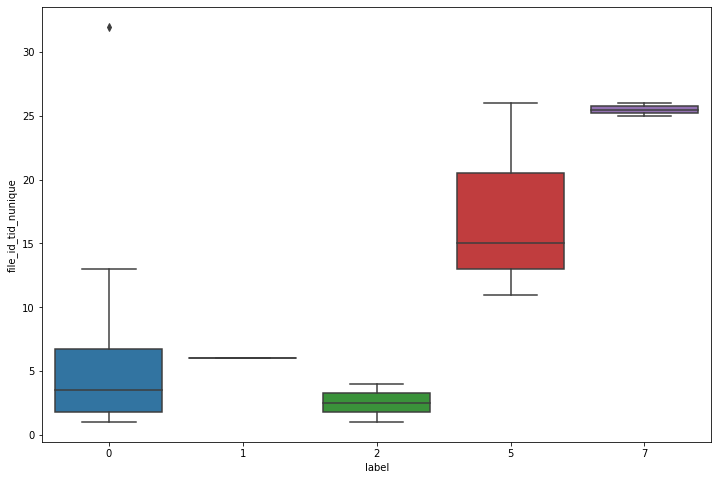

In [30]:
plt.figure(figsize=[12,8])
sns.boxplot(x =train_analysis['label'], y = train_analysis['file_id_tid_nunique'])

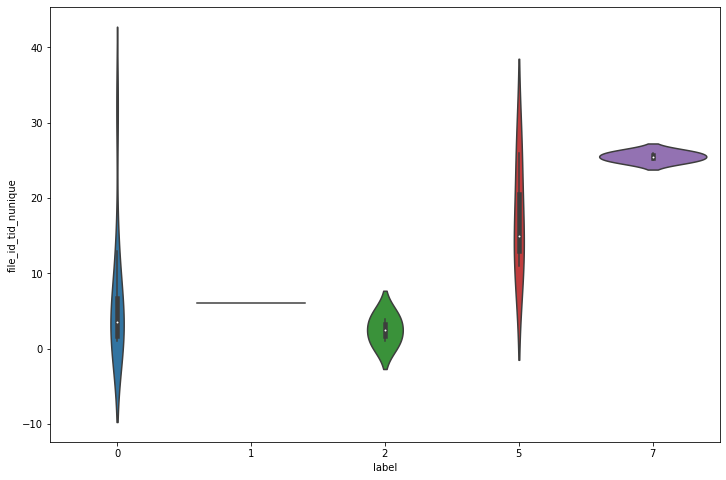

In [31]:
plt.figure(figsize=[12,8])
sns.violinplot(x =train_analysis['label'], y = train_analysis['file_id_tid_nunique'])

##### file_id & tid & max

In [32]:
dic_ = train.groupby('file_id')['tid'].max().to_dict()
train_analysis['file_id_tid_max'] = train_analysis['file_id'].map(dic_).values 

In [33]:
train_analysis['file_id_tid_max'].describe()

count      20.000000
mean     2701.800000
std       255.151472
min      2208.000000
25%      2554.000000
50%      2804.000000
75%      2841.000000
max      3060.000000
Name: file_id_tid_max, dtype: float64

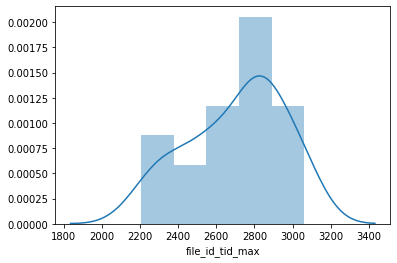

In [34]:
sns.distplot(train_analysis['file_id_tid_max']) 

##### file_id_tid_max & label 分析

Text(0, 0.5, 'label_number')

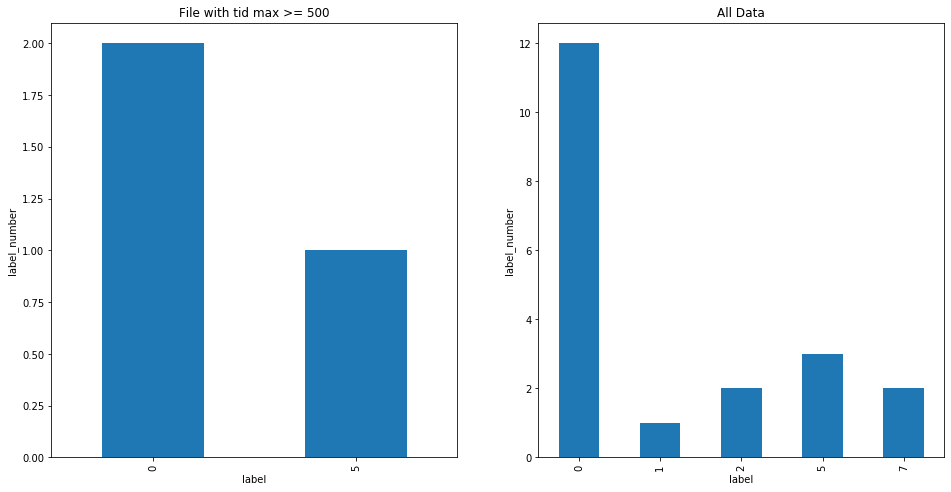

In [35]:
plt.figure(figsize=[16,8])
plt.subplot(121)
train_analysis.loc[train_analysis.file_id_tid_max >= 3000]['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('File with tid max >= 3000')
plt.xlabel('label')
plt.ylabel('label_number') 
 
plt.subplot(122)
train_analysis['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('All Data')
plt.xlabel('label')
plt.ylabel('label_number')  

##### api & label

In [36]:
train['api_label'] = train['api'] + '_' + train['label'].astype(str)
dic_ = train['api_label'].value_counts().to_dict()

In [37]:
df_api_label = pd.DataFrame.from_dict(dic_,orient = 'index').reset_index()
df_api_label.columns = ['api_label', 'api_label_count']

In [38]:
df_api_label['label'] = df_api_label['api_label'].apply(lambda x:int(x.split('_')[-1]))

In [39]:
labels = df_api_label['label'].unique()
for label in range(8):
    print('*' * 50, label,'*' * 50)
    print(df_api_label.loc[df_api_label.label == label].sort_values('api_label_count').iloc[-5:][['api_label','api_label_count']])
    print('*' * 103)

************************************************** 0 **************************************************
                  api_label  api_label_count
7  LdrGetProcedureAddress_0             2852
5           NtOpenProcess_0             3355
4                 NtClose_0             3808
3     NtReadVirtualMemory_0             4962
2        RegQueryValueExW_0             7334
*******************************************************************************************************
************************************************** 1 **************************************************
                    api_label  api_label_count
206           RegOpenKeyExW_1               24
172        RegQueryValueExA_1               34
166             RegCloseKey_1               38
110                 NtClose_1               87
81   LdrGetProcedureAddress_1              150
*******************************************************************************************************
********************************